Cho dataset: homedata.csv.
Dựa vào dữ liệu của các cột:
features = ["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]
Dùng Machine Learning Model – LinearRegression() và phương pháp học máy có giám
sát, để dự đoán SalePrice của một input bất kỳ.
1. Thực hiện các bước Data Preprocessing cần thiết cho X_train và Y_train (chiếm
80% dữ liệu homedata)
2. Dùng ML model – LinearRegression() để training với phương pháp học máy có
giám sát.
3. Giả sử X_test là dữ liệu đầu vào để kiểm tra model huấn luyện (X_test chiếm
20% của dữ liệu homedata), sau đó nhận được đầu ra Y_predict. Vẽ Y_predict
và Y_test trong cùng 1 hình (ghi chú legend, trục X (là “Id” của X_test trong
dataset), trục Y, title), trong đó Y_test (tương ứng với X_test) là dữ liệu
SalePrice của homedata và chiếm 20%.

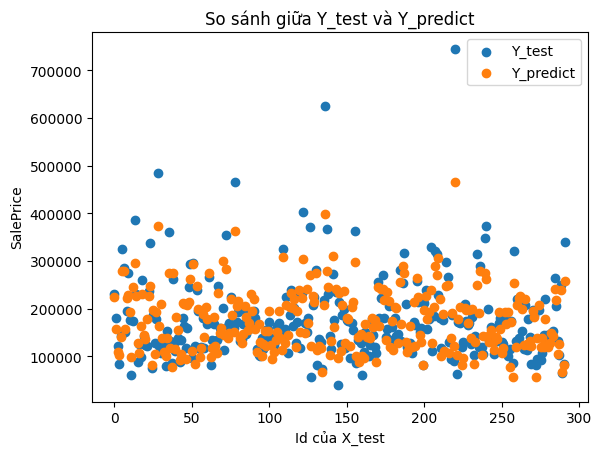

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load data
df  = pd.read_csv('homedata.csv')

# Các cột quan trọng để xây dựng mô hình
df = df[["LotArea", "YearBuilt", "1stFlrSF", "2ndFlrSF", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd", "SalePrice"]]

X = df.iloc[:,0:7].values
Y = df.iloc[:,7].values

# Data Preprocessing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

# Chọn model LinearRegression
model = LinearRegression()
# fit training data into model
model.fit(X_train,Y_train)
# test với X_test
Y_predict = model.predict(X_test)

# Vẽ biểu đồ so sánh giữa Y_test và Y_predict
np.random.seed(1)
X_test_ids = np.arange(0, len(X_test))
plt.figure()
# Vẽ Y_test
plt.scatter(X_test_ids, Y_test, label='Y_test')
# Vẽ Y_predict
plt.scatter(X_test_ids, Y_predict, label='Y_predict')
plt.title('So sánh giữa Y_test và Y_predict')
plt.xlabel('Id của X_test')
plt.ylabel('SalePrice')
plt.legend()
plt.show()
